# 10-05 연습문제
당신은 매일 아침 동네 빵집에서 식빵을 구입해 왔다.
이 식빵의 무게는 500g이라고 표시되어 있다. 하지만 당신은 자신이 구매하는 빵이 
500g이 맞는지 의구심이 들기 시작한다. 그

래서 1개월간 식빵을 사운 뒤 매일 무게를 기록하였고 그 결과는 bread 데이터셋으로 저장하였다.25일간 측정한 빵의 평균 무게는 480g이었다. 이 값을 가지고 식빵의 무게가 500g이 되지 않는다며 베이커리를 찾아가 컴플레인을 해야 할까?


> 본인은 컴플레인 할 만 하다고 생각함
> 
빵 무게에 대한 신뢰수준이 95% 일 때 신뢰수준이 478.6 - 480.9 로
표본 수집을 100번 했을 때, 그 중 95번의 빵 무게 평균이 500g 에는 한참 못 미치는 수준이었음


빵 무게가 정규분포를 따르는 걸 확인한 후에 t test 를 진행했을 떄도
 대립가설(H₁)      | μ < 500   |  평균 빵 무게는 500 보다 적다       |

일 때, p.value 0.000 수준에서 대립가설이 채택되었음




### #01. 준비작업
#### [1] 패키지 참조

In [9]:
from hossam import load_data
from matplotlib import pyplot as plt
from matplotlib import font_manager as fm
from pandas import DataFrame
import seaborn as sb
import numpy as np
from math import sqrt
 # 단일표본 T-Test를 위한 라이브러리
from scipy.stats import t, ttest_1samp, normaltest

#### [2] 그래프 초기화

In [3]:
#한글을 지원하는 폰트 파일의 경로
font_path ='C:\\Data_Analysis_Basic\\[LAB-06] 데이터 시각화 개요\\NotoSansKR-Regular.ttf'
#폰트의 그룹을 시스템에 등록
fm.fontManager.addfont(font_path)
#폰트의 속성을 읽어옴
font_prop = fm.FontProperties(fname=font_path)
#읽어온 속성에서 폰트의 이름만 추출
font_name = font_prop.get_name()

#이미지의 선명도를 결정 (1인치 당 픽셀의 수)
my_dpi = 120 
#시스템에 등록된 글꼴 이름  (상단에서 확인한 폰트 이름으로 넣기)
my_font_name = 'Noto Sans KR'
#그림 스타일 지정
my_theme = 'dark'
#seaborn 스타일 (화풍 설정하기)
sb.set_theme(style=my_theme)
#그래프에 한글 폰트 적용
plt.rcParams['font.family']=my_font_name
#기본 폰트 크기
plt.rcParams['font.size'] =16
#그래프에 마이너스 꺠짐 방지 (한글환경에서 필수)
plt.rcParams['axes.unicode_minus']=False

#### [3] 데이터 가져오기

In [4]:
origin = load_data('bread')

print("\n=====  데이터 크기 확인 =====")
print(f"데이터셋 크기: {origin.shape}")
print(f"열 개수: {origin.shape[1]}")
print(f"행 개수: {origin.shape[0]}")

print("\n=====  타입확인 =====")
print(origin.info())

origin.head()


[data] https://data.hossam.kr/data/lab10_/bread.xlsx
[desc] 매일 아침 동네 빵집에서 식빵을 구입해 무게를 기록한 데이터
[!] Cannot read metadata

=====  데이터 크기 확인 =====
데이터셋 크기: (25, 1)
열 개수: 1
행 개수: 25

=====  타입확인 =====
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25 entries, 0 to 24
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   무게      25 non-null     int64
dtypes: int64(1)
memory usage: 332.0 bytes
None


,무게
0,482
1,479
2,485
3,474
4,479


25일간 측정한 빵의 평균 무게는 480 g
500g 이 되지 않는다고 컴플레인 해야할까?

빵의 무게로 인정될 수 있는 범위를 찾아보자

#### [4] 신뢰구간 확인


표본 평균이 신

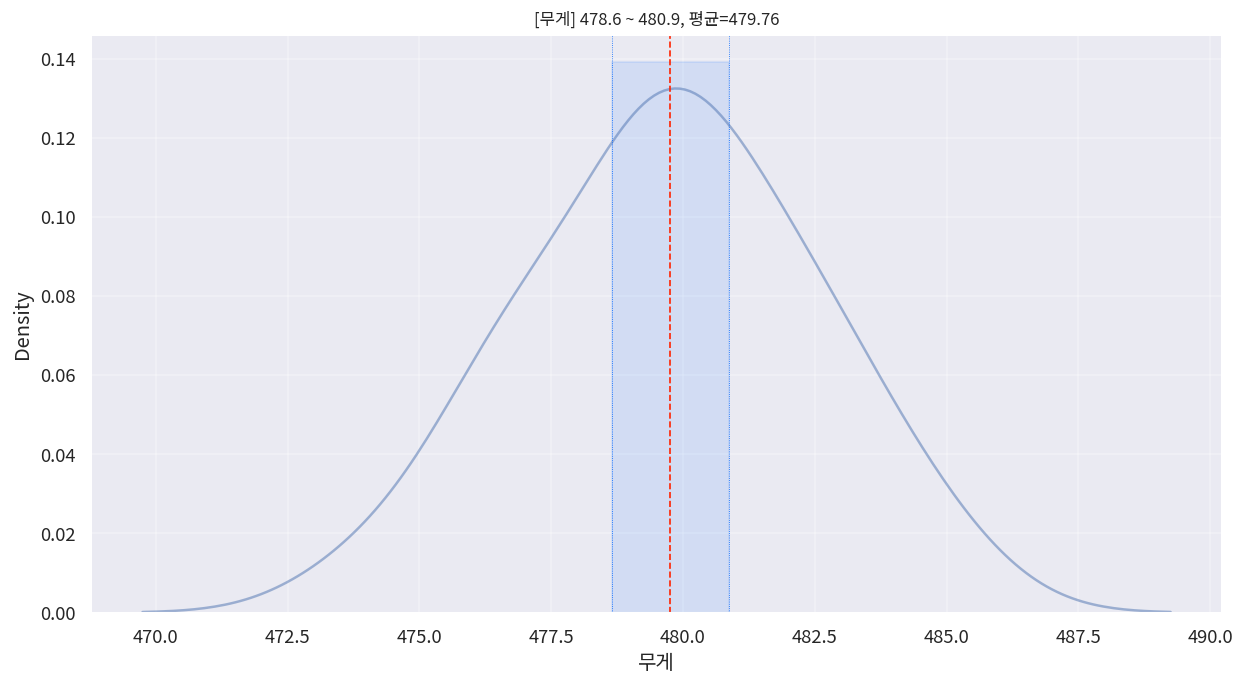

In [5]:
data = origin['무게']                     # 확인할 데이터(컬럼단위)
max = data.max()                         # 최대값
clevel = 0.95                            # 신뢰수준
dof = len(data) - 1                      # 자유도
sp_mean = data.mean()                    # 표본평균
sp_std = data.std(ddof=1)                # 표본표준편차
sp_std_error = sp_std / sqrt(len(data))  # 표본표준오차

# 신뢰구간
cmin, cmax = t.interval(clevel, dof, loc=sp_mean, scale=sp_std_error)

# 1) 그래프 초기화
width_px  = 1280                         # 그래프 가로 크기
height_px = 720                          # 그래프 세로 크기
rows = 1                                 # 그래프 행 수
cols = 1                                 # 그래프 열 수
figsize = (width_px / my_dpi, height_px / my_dpi)
fig, ax = plt.subplots(rows, cols, figsize=figsize, dpi=my_dpi)

# 2) KDE Plot 그리기
sb.kdeplot(data=data, fill=False, alpha=0.5)

# 신뢰구간 범위 그리기 (cmin ~ cmax)
ax.axvline(cmin, linestyle=':', color='#0066ff', linewidth=0.5)
ax.axvline(cmax, linestyle=':', color='#0066ff', linewidth=0.5)

# 현재 축 범위 가져오기
ymin, ymax = ax.get_ylim()
ax.fill_between([cmin, cmax], 0, ymax, alpha=0.1, color='#0066ff88')

# 평균 표시
ax.axvline(sp_mean, linestyle='--', linewidth=1, color='#ff2200')

# 3) 그래프 꾸미기
ax.grid(True, alpha=0.3)                 # 배경 격자 표시/숨김
ax.set_title(f"[{data.name}] {cmin:.1f} ~ {cmax:.1f}, 평균={sp_mean:.2f}", fontsize=10)

# 4) 출력
plt.tight_layout()                       # 여백 제거
plt.show()                               # 그래프 화면 출력
plt.close()                              # 그래프 작업 종료


> 표본 평균이 신뢰구간 범위에 속해있으므로 표본 (내가 구입한 빵) 의 평균이 모집단 (빵집에서 판매하는 모든 빵) 평균과 큰 차이가 없음을 의미한다
>그러므로, 내가 구입한 빵으로 이 빵집의 모든 빵에 대한 평균 무게를 추측해도 된다는 것을 의미

#### [5] 데이터의 정규성 검정

In [6]:
s, p = normaltest(origin['무게'])
"statistic: {0:.3f}, p-value: {1:.3f}, 정규성 충족 여부: {2}".format(s, p, p > 0.05)

'statistic: 0.083, p-value: 0.959, 정규성 충족 여부: True'

#### [6] 빵의 무게는 원래 알려져있던 500 그램과 다를까? 또 다르다면 더 적게 다를까?


| 구분              | 수식       | 내용                                            |
|-------------------|------------|-------------------------------------------------|
| 평균 빵의 무게 | μ          |                                                 |
| 귀무가설(H₀)      | μ = 500  | 평균 빵 무게는 500 과 차이가 없다.       |
| 대립가설(H₁)      | μ ≠ 500   |  평균 빵 무게는 500과 차이가 있다.       |


In [7]:
s, p = ttest_1samp(origin['무게'], 500)
"statistic: {0:.3f}, p-value: {1:.3f}, {2}가설 채택".format(s, p, "대립" if p <= 0.05 else "귀무")

'statistic: -37.524, p-value: 0.000, 대립가설 채택'

| 구분              | 수식       | 내용                                            |
|-------------------|------------|-------------------------------------------------|
| 평균 빵의 무게 | μ          |                                                 |
| 귀무가설(H₀)      | μ >= 500  | 평균 빵 무게는 500 보다 크다       |
| 대립가설(H₁)      | μ < 500   |  평균 빵 무게는 500 보다 적다       |


In [8]:
s, p = ttest_1samp(origin['무게'], 500, alternative='less')
print(
    "statistic: {0:.3f}, p-value: {1:.3f}, {2}가설 채택"
    .format(s, p, "대립" if p <= 0.05 else "귀무")
)

statistic: -37.524, p-value: 0.000, 대립가설 채택
